In [7]:
from pybaseball import schedule_and_record
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
huskies = schedule_and_record(1995, 'SEA')  # an analogue for our heavy hitters
tigers = schedule_and_record(2003, 'DET')  # perhaps the worst baseball team of all time
mariners = schedule_and_record(2001, 'SEA')  # record for single-season wins

In [9]:
# create a numeric indicator of a win and take cumulative sum of wins-to-date at each point in the season
huskies['win-count'] = np.where(huskies['W/L']=='W', 1, 0).cumsum()
tigers['win-count'] = np.where(tigers['W/L']=='W', 1, 0).cumsum()
mariners['win-count'] = np.where(mariners['W/L']=='W', 1, 0).cumsum()

In [10]:
huskies['win-count']

1       1
2       2
3       3
4       3
5       4
       ..
141    69
142    70
143    70
144    70
145    71
Name: win-count, Length: 145, dtype: int64

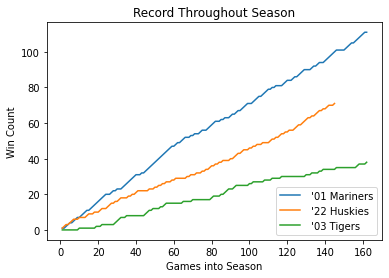

In [11]:
plt.plot(mariners['win-count'],label=" '01 Mariners")
plt.plot(huskies['win-count'],label=" '22 Huskies")
plt.plot(tigers['win-count'],label=" '03 Tigers")
plt.legend(loc=4)
plt.xlabel('Games into Season')
plt.ylabel('Win Count')
plt.title('Record Throughout Season');

In [12]:
mariners['scorediff'] = (mariners['R'] - mariners['RA']).cumsum()
huskies['scorediff'] = (huskies['R'] - huskies['RA']).cumsum()
tigers['scorediff'] = (tigers['R'] - tigers['RA']).cumsum()

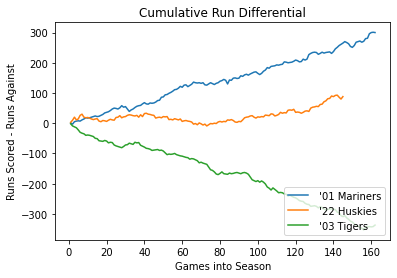

In [13]:
plt.plot(mariners['scorediff'],label=" '01 Mariners")
plt.plot(huskies['scorediff'],label=" '22 Huskies")
plt.plot(tigers['scorediff'],label=" '03 Tigers")
plt.legend(loc=4)
plt.xlabel('Games into Season')
plt.ylabel('Runs Scored - Runs Against')
plt.title('Cumulative Run Differential');

In [14]:
mariners_scorediff = mariners.scorediff.to_frame(name='mariners')
tigers_scorediff = tigers.scorediff.to_frame(name='tigers')
huskies_scorediff = huskies.scorediff.to_frame(name='huskies')

In [15]:
mariners_scorediff.to_csv('mariners_scorediff.csv')
huskies_scorediff.to_csv('huskies_scorediff.csv')
tigers_scorediff.to_csv('tigers_scorediff.csv')
huskies['win-count'].to_csv('huskies_wincount.csv')
tigers['win-count'].to_csv('tigers_wincount.csv')
mariners['win-count'].to_csv('mariners_wincount.csv')